In [29]:
from IPython.core.debugger import set_trace

import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import pickle
import time

%matplotlib inline


In the cell below we install faker, the program we used to generate and experiment with phony test data before we had developed the front-end of our website. 

In [30]:
!pip install faker

In [31]:
from faker import Faker
from random import randint
randint(100, 999)

fake = Faker()

def faker_categorical(num=1, seed=None):
    """
    """
    np.random.seed(seed)
    fake.seed_instance(seed)

    output = [
        {
            "Student ID": randint(100000000, 999999999),
            "Name": fake.last_name(),
            "Email": fake.free_email(),
            "Phone Number": randint(1000000000, 9999999999),
                        "Gender": np.random.choice(["M", "F", "Not Specified"], p=[0.3, 0.6, 0.1]),
            "Year": np.random.choice(["Freshman", "Sophmore", "Junior", "Senior", "Graduate"]),
            "Greek": np.random.choice(["AEPhi", "AEPi", "ZBT", "Pi Phi", "Chi O", "Theta", "Phi Mu", "Kappa",
                                      "Zeta Psi", "KSig", "SigEp"]),
            "Dorm": np.random.choice(["Sharp 1", "Sharp 2", "Irby 345", "Phelps 233", "Mayer 420", "Butler 5",
                                     "Sharp 4", "Monroe 2", "Irby 385", "Aron 233", "Mayer 400", "Aron 439"]),
            "In Person Class": np.random.choice(["Math", "Finance", "Science"], p=[0.4, 0.5, 0.1]),
            "Clubs": np.random.choice(["Book club", "Cycling", "Tennis Club", "Soccer Club", "Rowing",
                                        "Karate", "Baseball Club", "Comedy Club", "Feminism", "Dance Team",
                                      "Running", "Walking", "Cookies and Code"])
        }
        for x in range(num)
    ]
    return output

In [32]:
df = pd.DataFrame(faker_categorical(num=100, seed=0))
df

,Student ID,Name,Email,Phone Number,Gender,Year,Greek,Dorm,In Person Class,Clubs
0,174839199,Richard,gwilliams@yahoo.com,8659538577,F,Freshman,Pi Phi,Aron 439,Finance,Dance Team
1,730750003,Sullivan,tammy59@gmail.com,3779312543,F,Junior,Chi O,Monroe 2,Finance,Feminism
2,497246452,Wagner,donald19@yahoo.com,4741890813,M,Sophmore,Phi Mu,Monroe 2,Finance,Feminism
3,696503792,Archer,kyleblair@hotmail.com,7652425361,F,Sophmore,Zeta Psi,Aron 233,Finance,Book club
4,387105485,Rivera,gomezleslie@hotmail.com,7554403089,F,Freshman,ZBT,Phelps 233,Finance,Soccer Club
...,...,...,...,...,...,...,...,...,...,...
95,452110997,Lucero,stonekristen@gmail.com,7468078578,F,Freshman,Pi Phi,Butler 5,Finance,Running
96,394319106,Johnson,wwallace@gmail.com,3687888717,F,Freshman,AEPi,Irby 345,Finance,Cycling
97,955598062,Gibson,huberrachel@gmail.com,3107765278,M,Senior,AEPhi,Mayer 420,Math,Cycling
98,476074526,Tucker,duffyelizabeth@hotmail.com,5426321807,F,Freshman,ZBT,Phelps 233,Math,Dance Team


In [33]:
# Function to return a list of organizations which the student is involved in. 
def generate_student_org_list(student_id):
    return df.loc[df['Student ID'] == student_id]

In the cell below we test out adding a student to the dataframe using their student ID. This can be used when adding a club/organization roster to the data frame or to add a student to a new dataframe of students currently testing positive.

In [34]:
df = df.append({"Student ID":653254103, "Clubs":"baking"}, ignore_index=True)
generate_student_org_list(653254103)


,Student ID,Name,Email,Phone Number,Gender,Year,Greek,Dorm,In Person Class,Clubs
100,653254103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,baking


In [35]:
def get_student_orgs(student_id):
    student_df = df.loc[df['Student ID'] == student_id]
    student_org_list = []   # List of student's organizations.
  
    for row in student_df.itertuples():
        for element in range(1, len(row)):
            if(str(row[element]) != "nan"):
                student_org_list.append(row[element])
    return set(student_org_list)

def get_other_students(student_id):
    for i in get_student_orgs(student_id):
        print (i)

In [36]:
get_other_students(653254103)

baking
653254103


In [37]:
df.loc[df.Greek == 'Chi O']

,Student ID,Name,Email,Phone Number,Gender,Year,Greek,Dorm,In Person Class,Clubs
1,730750003,Sullivan,tammy59@gmail.com,3.779313e+09,F,Junior,Chi O,Monroe 2,Finance,Feminism
6,102628178,Brown,davismary@hotmail.com,1.753526e+09,Not Specified,Junior,Chi O,Monroe 2,Math,Walking
8,366181586,Sanchez,jane13@hotmail.com,2.813409e+09,M,Freshman,Chi O,Sharp 2,Science,Dance Team
18,759257537,Keller,christopher91@yahoo.com,2.838484e+09,F,Senior,Chi O,Sharp 2,Finance,Dance Team
24,546387104,Johnson,leetara@hotmail.com,2.539930e+09,Not Specified,Freshman,Chi O,Phelps 233,Finance,Cookies and Code
27,585412050,Walker,michael20@hotmail.com,4.039937e+09,F,Freshman,Chi O,Aron 439,Finance,Baseball Club
33,207148905,Golden,deborah64@gmail.com,4.463558e+09,M,Senior,Chi O,Butler 5,Finance,Soccer Club
39,502904699,Page,sjohnson@hotmail.com,1.758518e+09,M,Graduate,Chi O,Sharp 1,Science,Comedy Club
46,562809406,Baird,leecharlene@gmail.com,5.744858e+09,M,Freshman,Chi O,Phelps 233,Science,Feminism
50,395184980,Roth,darin24@gmail.com,8.223512e+09,F,Junior,Chi O,Sharp 4,Math,Soccer Club


In [38]:
# Creating a new dataframe that contains students who have tested positive.
positive_df = pd.DataFrame(columns={'Student ID':[],'Antibodies':[],'Date of Positive Test':[],'Name':[],
                                    'Email':[], 'Greek':[],'Gender':[], 'Year':[], 'Dorm':[], 'Clubs':[]})

def if_tested_positive(student_name):
    # Getting the index of the student in the original dataframe. 
    positive_index = df.loc[df.Name == student_name].index
    
    # Adding the student to the positive dataframe.
    positive_df = positive_df.append(df.iloc[positive_index], ignore_index=True)


In [39]:
fakeResults = []
import random
for i in range (0,101):
    n = random.randint(0,1)
    fakeResults.append(n)
fakeResults
df["Test_Result"] = fakeResults    # Adding a column to the dataframe.
df = df[0:99]

In the cell below, we are deriving a dataframe of students who have tested positive from the larger dataframe of all students.

In [40]:
positive_students = df[df["Test_Result"] == 1]

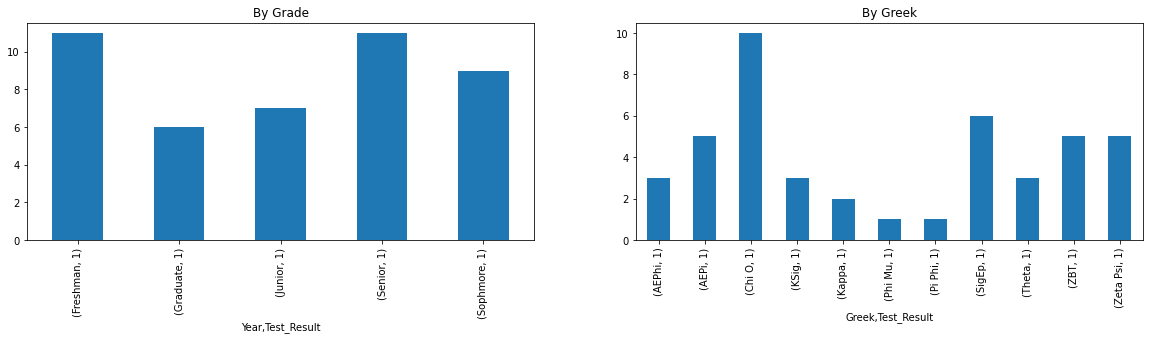

In [41]:
year_positives = positive_students.groupby("Year").Test_Result.value_counts()
greek_positives = positive_students.groupby("Greek").Test_Result.value_counts()

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,4))

year_positives.plot(kind='bar', legend=False, title="By Grade", ax=ax1)
greek_positives.plot(kind='bar', legend=False, title="By Greek", ax=ax2)

The graphs pictured above display the distribution of positive tests organized by year in school (left) and Greek organization (right). 

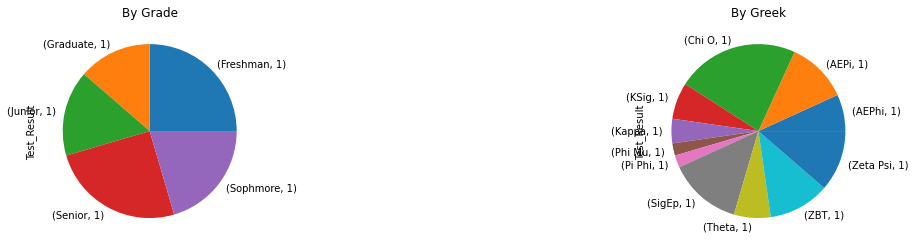

In [42]:
year_positives = positive_students.groupby("Year").Test_Result.value_counts()
greek_positives = positive_students.groupby("Greek").Test_Result.value_counts()

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,4))

year_positives.plot(kind='pie', legend=False, title="By Grade", ax=ax1)
greek_positives.plot(kind='pie', legend=False, title="By Greek", ax=ax2)

The graphs pictured above display the distribution of positive tests organized by year in school (left) and Greek organization (right), this time in the form of a pie chart. We generated these charts to gain a better understanding of COVID cases on campus with more detailed visualizations. 

In [43]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer

from sklearn.impute import KNNImputer

features = ["Year", "Greek", "Clubs"]
X_train_dict = df[features].to_dict(orient="records")

x_new_dict = [{
    "Year": "Freshman",
    "Greek" : "ZBT",
    "Clubs" : "Walking"
}]

y_train = df["Test_Result"]

# Dummy encoding
vec = DictVectorizer(sparse=False)
vec.fit(X_train_dict)
X_train = vec.transform(X_train_dict)
X_new = vec.transform(x_new_dict)

# Standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_new_sc = scaler.transform(X_new)

# K-Nearest Neighbors Model
model = KNeighborsRegressor(n_neighbors=30)
model.fit(X_train_sc, y_train)
model.predict(X_new_sc)

array([0.36666667])

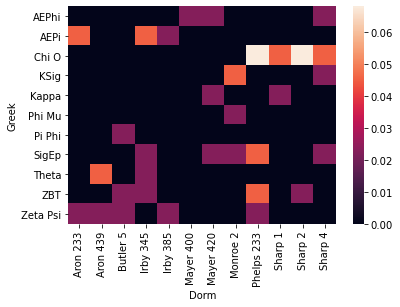

In [44]:
import seaborn as sns

counts = pd.crosstab(positive_students.Greek, positive_students.Dorm)
joint = counts / counts.sum().sum()
sns.heatmap(joint) #in this instance, outbreak in ZBT irby- CT can act accordingly

In [45]:
greek_class_counts = positive_students.pivot_table(
    index="Year", columns="Greek",
    values="Name",  # We can pretty much count any column, as long as there are no NaNs.
    aggfunc="count" # The count function will count the number of non-null values.
)
greek_class_counts

Greek,AEPhi,AEPi,Chi O,KSig,Kappa,Phi Mu,Pi Phi,SigEp,Theta,ZBT,Zeta Psi
Year,,,,,,,,,,,
Freshman,NaN,1.0,3.0,1.0,NaN,NaN,1.0,1.0,NaN,2.0,2.0
Graduate,NaN,1.0,2.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0
Junior,1.0,1.0,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0
Senior,2.0,1.0,2.0,NaN,1.0,NaN,NaN,NaN,2.0,2.0,1.0
Sophmore,NaN,1.0,1.0,2.0,1.0,1.0,NaN,2.0,NaN,1.0,NaN


<b>Resources</b>
<br>
Installing Faker: https://www.youtube.com/watch?v=jtOtFPIiflA
<br>
